### Linear Regression

Using sklearn's [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression) function to generate a regression dataset that will be used to solve the problems below.

(1000, 1)
(1000, 1)
(1000, 2)


Text(0,0.5,'y: output')

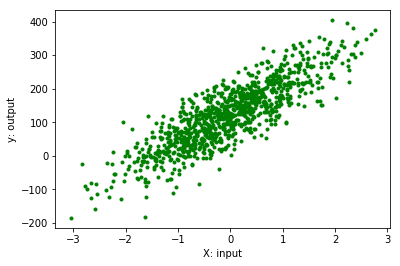

In [62]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

# number of samples to generate
n_samples = 1000

# generate the dataset
X, y, coef = datasets.make_regression(n_samples=n_samples,
                                      n_features=1,
                                      n_informative=1,
                                      bias=125,
                                      noise=50,
                                      coef=True,
                                      random_state=0)
print(X.shape)
ones = np.ones((n_samples,1))
print(ones.shape)
X = np.append(ones,X, axis=1)
print(X.shape)

# plot the dataset
fig = plt.figure()

# add a subplot
ax = fig.add_subplot(111)
ax.scatter(X[:,1], y, color='green', marker='.',
            label='Regression Data')
ax.set_xlabel('X: input')
ax.set_ylabel('y: output')

### Linear Regression with Batch Gradient Descent

Implement the batch gradient descent algorithm and apply it to the generated dataset.

(2, 1)
(1000, 1)
[[-113.42155405]
 [ 303.75721993]
 [  38.92204088]
 [  52.59371238]
 [  -5.45195272]
 [ 128.41708463]
 [ 292.55048299]
 [ 130.9165922 ]
 [  36.39527478]
 [ 198.86360581]]
(1000, 1)
[[-113.42155405]
 [ 303.75721993]
 [  38.92204088]
 [  52.59371238]
 [  -5.45195272]
 [ 128.41708463]
 [ 292.55048299]
 [ 130.9165922 ]
 [  36.39527478]
 [ 198.86360581]]
[[126.29387919]
 [ 81.89512864]]


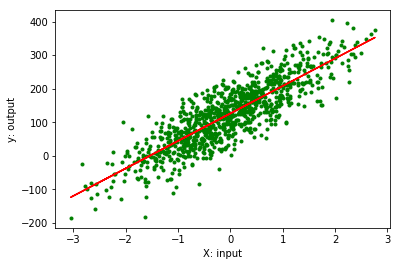

In [65]:
# we'll usually initialize theta before starting the algorihtm
theta = np.matrix([1,1]).T
print(theta.shape)
print(y.shape)
y = np.reshape(y, (1000,1))
print(y[0:10])
print(y.shape)
# This is number of times that we'll update the weights
T = 100

# set the learning rate
alpha = 0.001

# for plotting, we'll keep track of each weight update
points = [theta]

# batch gradient descent
for t in range(T):
    theta = theta - alpha*X.T@(X@theta-y)
    #points.append(theta)

print(y[0:10])
print(theta)
fig = plt.figure()

# add a subplot
ax = fig.add_subplot(111)
ax.scatter(X[:,1], y, color='green', marker='.',
            label='Regression Data')
ax.set_xlabel('X: input')
ax.set_ylabel('y: output')
ax.plot(X[:,1], X@theta, color='red')


### Linear Regression with Stochastic Gradient Descent
Implement the stochastic gradient descent algorithm and apply it to the generated dataset.

[[133.19167944]
 [ 92.05659678]]


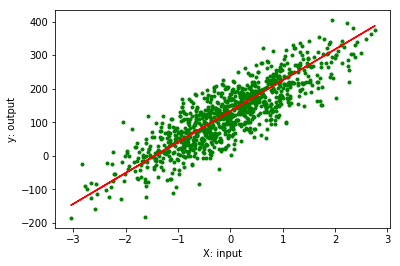

In [64]:
# initialize the weights
theta = np.matrix([2,4]).T

# This is number of times that we'll update the weights
T = 50

# set the learning rate
alpha = 0.1

# let's shuffle the examples, makes training better
n = X.shape[0]
perm = np.arange(n)
np.random.shuffle(perm)

# for plotting, we'll keep track of each weight update
points = [theta]

# stochastic gradient descent
for t in range(T):
    i = t % n
    xi,yi = X[i,:], y[i] 
    xi = np.reshape(xi,(1, xi.shape[0]))
    theta = theta - alpha*xi.T*(xi@theta-yi)
    points.append(theta)

print(theta)
fig = plt.figure()

# add a subplot
ax = fig.add_subplot(111)
ax.scatter(X[:,1], y, color='green', marker='.',
            label='Regression Data')
ax.set_xlabel('X: input')
ax.set_ylabel('y: output')
ax.plot(X[:,1], X@theta, color='red')